Importing necessary packages

In [1]:
# Importing packages

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.stats import pearsonr
# import graphviz





Reading Dataset

In [2]:
# Reading dataset

orig_dataset = pd.read_csv('new.csv')




Feature Selection

In [3]:
# Removing variables

dataset = orig_dataset.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 
                                     'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
                                     'health', 'absences', 'G1', 'G2'])



Classifying Students' Grade


In [4]:
# Classifying Grades

G3 = dataset['G3']


class students_grades():

    def __init__(self, series):
        self.series = series

    def grades(self):
        grades_students = []
        for z in self.series:
            if  z < 10:
                grades_students.append('Fail')
            else: 
                grades_students.append('Pass')
        return grades_students
    
    # def passed(self):
    #     passed_students = []
    #     for z in self.series:
    #         if z >= 10:
    #             passed_students.append('Pass')
    #     return passed_students

G3_class = students_grades(G3)

# G3_grades = G3_class.fail() + G3_class.passed()

G3_grades = G3_class.grades()

x = pd.DataFrame(G3_grades, columns=['G3_int']) 
new_dataset = dataset.join(x)

new_dataset = new_dataset.drop('G3', axis = 1)





Feature Engineering

In [6]:
# One Hot Encoding

numeric_features = ['age', 'studytime']

dataset_categorical = new_dataset.drop(numeric_features, axis = 1)
dataset_numerical = new_dataset[numeric_features]

onehot = make_pipeline(OneHotEncoder(drop='first', sparse_output= False))

encoded = onehot.fit_transform(dataset_categorical)
encoded = pd.DataFrame(encoded, columns=['sex', 'paid', 'internet', 'romantic', 'G3_int'])

dataset_v2 = encoded.join(dataset_numerical)


Splitting Data

In [7]:
# Splitting Data

training_set, testing_set = train_test_split(dataset_v2, test_size=0.3, random_state=25)




Data Transformation Pipeline (Training)

In [8]:
# Data Transformation Pipeline

# Normalization

normal = make_pipeline(MinMaxScaler())
normal_training = pd.DataFrame(normal.fit_transform(training_set), columns=['sex', 'paid', 'internet', 'romantic', 'G3_int', 'age', 'studytime'])

# Standardization

standard_training = training_set.copy()
standard_age_train = np.array(standard_training['age']).reshape(-1,1)
standard_studytime_train = np.array(standard_training['studytime']).reshape(-1,1)

standard_as_train = np.concatenate((standard_age_train, standard_studytime_train), axis = 1)

standard = make_pipeline(StandardScaler())

as_features_train = ['age', 'studytime']

standard_as_train = standard.fit_transform(standard_as_train)

standard_training[as_features_train] = standard_as_train

standard_training.head()


,sex,paid,internet,romantic,G3_int,age,studytime
178,1.0,0.0,1.0,1.0,0.0,-0.526534,-1.260735
290,1.0,1.0,1.0,1.0,1.0,1.061700,-0.056711
86,0.0,0.0,0.0,0.0,0.0,-0.526534,-0.056711
73,1.0,0.0,0.0,0.0,1.0,-0.526534,-1.260735
184,0.0,1.0,1.0,0.0,1.0,-0.526534,-0.056711


Logistic Regression

In [9]:
# Logistic Regression

lr = LogisticRegression()

# Normalized

x_training_normal = normal_training.drop('G3_int', axis = 1)
y_training_normal = normal_training.G3_int

x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_training_normal, y_training_normal, test_size=0.3, random_state=25)

normal_lr = make_pipeline(LogisticRegression())
normal_lr.fit(x_train_normal, y_train_normal)
y_pred_normal_lr = normal_lr.predict(x_test_normal)
normal_classification_report_lr = classification_report(y_test_normal, y_pred_normal_lr)
print(normal_classification_report_lr)


normal_scores_lr = cross_val_score(lr, x_training_normal, y_training_normal, cv=10)
normal_mean_acc_scores_lr = np.mean(normal_scores_lr)
# print(normal_scores_lr)
print(f'Mean: {normal_mean_acc_scores_lr}')

# Standardized

x_training_standard = standard_training.drop('G3_int', axis = 1)
y_training_standard = standard_training.G3_int

x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x_training_standard, y_training_standard, test_size=0.3, random_state=25)

standard_lr = make_pipeline(LogisticRegression())
standard_lr.fit(x_train_standard, y_train_standard)
y_pred_standard_lr = standard_lr.predict(x_test_standard)
standard_classification_report_lr = classification_report(y_test_standard, y_pred_standard_lr)
print(standard_classification_report_lr)


standard_scores_lr = cross_val_score(lr, x_training_standard, y_training_standard, cv=10)
standard_mean_acc_scores_lr = np.mean(standard_scores_lr)
# print(standard_scores_lr)
print(f'Mean: {standard_mean_acc_scores_lr}')


              precision    recall  f1-score   support

         0.0       0.33      0.04      0.07        26
         1.0       0.69      0.96      0.80        57

    accuracy                           0.67        83
   macro avg       0.51      0.50      0.44        83
weighted avg       0.58      0.67      0.57        83

Mean: 0.6779100529100528
              precision    recall  f1-score   support

         0.0       0.40      0.08      0.13        26
         1.0       0.69      0.95      0.80        57

    accuracy                           0.67        83
   macro avg       0.55      0.51      0.46        83
weighted avg       0.60      0.67      0.59        83

Mean: 0.6810846560846562


AUC

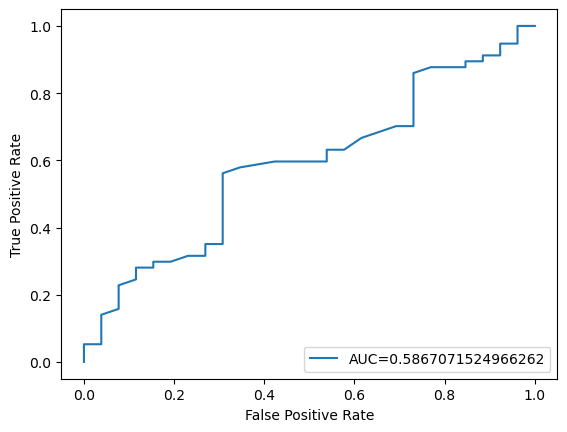

In [10]:
# AUC

y_pred_proba = standard_lr.predict_proba(x_test_standard)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_standard,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_standard, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Naive Bayes

In [11]:
# Naive Bayes

nb = GaussianNB()

# Normalized

normal_nb = make_pipeline(GaussianNB())
normal_nb.fit(x_train_normal, y_train_normal)
y_pred_normal_nb = normal_nb.predict(x_test_normal)
normal_classification_report_nb = classification_report(y_test_normal, y_pred_normal_nb)
print(normal_classification_report_nb)


normal_scores_nb = cross_val_score(nb, x_training_normal, y_training_normal, cv=10)
normal_mean_acc_scores_nb = np.mean(normal_scores_nb)
# print(normal_scores_nb)
print(f'Mean: {normal_mean_acc_scores_nb}')

# Standardized

standard_nb = make_pipeline(GaussianNB())
standard_nb.fit(x_train_standard, y_train_standard)
y_pred_standard_nb = standard_nb.predict(x_test_standard)
standard_classification_report_nb = classification_report(y_test_standard, y_pred_standard_nb)
print(standard_classification_report_nb)


standard_scores_nb = cross_val_score(nb, x_training_standard, y_training_standard, cv=10)
standard_mean_acc_scores_nb = np.mean(standard_scores_nb)
# print(standard_scores_nb)
print(f'Mean: {standard_mean_acc_scores_nb}')

              precision    recall  f1-score   support

         0.0       0.26      0.19      0.22        26
         1.0       0.67      0.75      0.71        57

    accuracy                           0.58        83
   macro avg       0.47      0.47      0.47        83
weighted avg       0.54      0.58      0.56        83

Mean: 0.6587301587301588
              precision    recall  f1-score   support

         0.0       0.26      0.19      0.22        26
         1.0       0.67      0.75      0.71        57

    accuracy                           0.58        83
   macro avg       0.47      0.47      0.47        83
weighted avg       0.54      0.58      0.56        83

Mean: 0.6587301587301588


K-Nearest Neighbours

In [12]:
# K-Nearest Neighbours

# Normalized

knn = KNeighborsClassifier()

normal_knn = make_pipeline(KNeighborsClassifier())
normal_knn.fit(x_train_normal, y_train_normal)
y_pred_normal_knn = normal_knn.predict(x_test_normal)
normal_classification_report_knn = classification_report(y_test_normal, y_pred_normal_knn)
print(normal_classification_report_knn)


normal_scores_knn = cross_val_score(knn, x_training_normal, y_training_normal, cv=10)
normal_mean_acc_scores_knn = np.mean(normal_scores_knn)
# print(normal_scores_knn)
print(f'Mean: {normal_mean_acc_scores_knn}')

# Standardized

standard_knn = make_pipeline(KNeighborsClassifier())
standard_knn.fit(x_train_standard, y_train_standard)
y_pred_standard_knn = standard_knn.predict(x_test_standard)
standard_classification_report_knn = classification_report(y_test_standard, y_pred_standard_knn)
print(standard_classification_report_knn)


standard_scores_knn = cross_val_score(knn, x_training_standard, y_training_standard, cv=10)
standard_mean_acc_scores_knn = np.mean(standard_scores_knn)
# print(standard_scores_knn)
print(f'Mean: {standard_mean_acc_scores_knn}')

              precision    recall  f1-score   support

         0.0       0.22      0.19      0.20        26
         1.0       0.65      0.68      0.67        57

    accuracy                           0.53        83
   macro avg       0.43      0.44      0.44        83
weighted avg       0.51      0.53      0.52        83

Mean: 0.6231481481481482
              precision    recall  f1-score   support

         0.0       0.35      0.23      0.28        26
         1.0       0.70      0.81      0.75        57

    accuracy                           0.63        83
   macro avg       0.52      0.52      0.51        83
weighted avg       0.59      0.63      0.60        83

Mean: 0.6337301587301587


Decision Tree Classifier

In [14]:
# Decision Tree Classifier

# Normalized

dtc = DecisionTreeClassifier()

normal_dtc = make_pipeline(DecisionTreeClassifier())
normal_dtc.fit(x_train_normal, y_train_normal)
y_pred_normal_dtc = normal_dtc.predict(x_test_normal)
normal_classification_report_dtc = classification_report(y_test_normal, y_pred_normal_dtc)
print(normal_classification_report_dtc)

normal_scores_dtc = cross_val_score(dtc, x_training_normal, y_training_normal, cv=10)
normal_mean_acc_scores_dtc = np.mean(normal_scores_dtc)
# print(normal_scores_dtc)
print(f'Mean: {normal_mean_acc_scores_dtc}')

# Standardized

standard_dtc = make_pipeline(DecisionTreeClassifier())
standard_dtc.fit(x_train_standard, y_train_standard)
y_pred_standard_dtc = standard_dtc.predict(x_test_standard)
standard_classification_report_dtc = classification_report(y_test_standard, y_pred_standard_dtc)
print(standard_classification_report_dtc)


standard_scores_dtc = cross_val_score(dtc, x_training_standard, y_training_standard, cv=10)
standard_mean_acc_scores_dtc = np.mean(standard_scores_dtc)
# print(standard_scores_dtc)
print(f'Mean: {standard_mean_acc_scores_dtc}')

              precision    recall  f1-score   support

         0.0       0.31      0.35      0.33        26
         1.0       0.69      0.65      0.67        57

    accuracy                           0.55        83
   macro avg       0.50      0.50      0.50        83
weighted avg       0.57      0.55      0.56        83

Mean: 0.5727513227513228
              precision    recall  f1-score   support

         0.0       0.33      0.35      0.34        26
         1.0       0.70      0.68      0.69        57

    accuracy                           0.58        83
   macro avg       0.51      0.52      0.51        83
weighted avg       0.58      0.58      0.58        83

Mean: 0.5693121693121693


Random Forest Classifier

In [15]:
# Random Forest Classifier

rfc = RandomForestClassifier()

# Normalized

normal_rfc = make_pipeline(RandomForestClassifier(random_state=10))
normal_rfc.fit(x_train_normal, y_train_normal)
y_pred_normal_rfc = normal_rfc.predict(x_test_normal)
normal_classification_report_rfc = classification_report(y_test_normal, y_pred_normal_rfc)
print(normal_classification_report_rfc)

cv = KFold(10, random_state=10, shuffle=True)

normal_scores_rfc = cross_val_score(rfc, x_training_normal, y_training_normal, cv=cv)
normal_mean_acc_scores_rfc = np.mean(normal_scores_rfc)
# print(normal_scores_rfc)
print(f'Mean: {normal_mean_acc_scores_rfc}')

# Standardized

standard_rfc = make_pipeline(RandomForestClassifier(random_state=10))
standard_rfc.fit(x_train_standard, y_train_standard)
y_pred_standard_rfc = standard_rfc.predict(x_test_standard)
standard_classification_report_rfc = classification_report(y_test_standard, y_pred_standard_rfc)
print(standard_classification_report_rfc)


standard_scores_rfc = cross_val_score(rfc, x_training_standard, y_training_standard, cv=cv)
standard_mean_acc_scores_rfc = np.mean(standard_scores_rfc)
# print(standard_scores_rfc)
print(f'Mean: {standard_mean_acc_scores_rfc}')




              precision    recall  f1-score   support

         0.0       0.23      0.19      0.21        26
         1.0       0.66      0.70      0.68        57

    accuracy                           0.54        83
   macro avg       0.44      0.45      0.44        83
weighted avg       0.52      0.54      0.53        83

Mean: 0.5944444444444446
              precision    recall  f1-score   support

         0.0       0.22      0.19      0.20        26
         1.0       0.65      0.68      0.67        57

    accuracy                           0.53        83
   macro avg       0.43      0.44      0.44        83
weighted avg       0.51      0.53      0.52        83

Mean: 0.5835978835978836


RFC Display

In [ ]:
# RFC Display

# Normalized

# rfc.fit(x_train_normal, y_train_normal)

# dot_data = export_graphviz(rfc.estimators_[2], feature_names=x_train_normal.columns, filled=True, max_depth=2, impurity=False, proportion=True)
# graph = graphviz.Source(dot_data)
# display(graph)

Hyperparameter Tuning

In [14]:
# Randomized Search Cross Validation

# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# max_features = ['log2', 'sqrt', None]
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = randint(2,11)
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



# # Normalized

# lr_random_normal = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 80, cv = 5, verbose=2, random_state=40, n_jobs = -1)

# lr_random_normal.fit(x_train_normal, y_train_normal)
# print(lr_random_normal.best_params_)

# # Standardized

# lr_random_standard = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 80, cv = 5, verbose=2, random_state=40, n_jobs = -1)

# lr_random_standard.fit(x_train_standard, y_train_standard)
# print(lr_random_standard.best_params_)

solver = ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag']
penalty = ['none', 'l2']
C = [0.01, 1, 10]

random_grid = {'solver': solver,
               'penalty': penalty,
               'C': C}

# Normalized

lr_grid_normal = GridSearchCV(estimator = lr, param_grid = random_grid, cv = 10, verbose=2, n_jobs = -1)

lr_grid_normal.fit(x_train_normal, y_train_normal)
print(lr_grid_normal.best_params_)

# Standardized

lr_grid_standard = GridSearchCV(estimator = lr, param_grid = random_grid, cv = 10, verbose=2, n_jobs = -1)

lr_grid_standard.fit(x_train_standard, y_train_standard)
print(lr_grid_standard.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


Results

In [ ]:
# Results

# lr_random_normal_df = pd.DataFrame(lr_random_normal.cv_results_)

# lr_random_standard_df = pd.DataFrame(lr_random_standard.cv_results_)

# lr_random_normal_df_sorted = lr_random_normal_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)

# lr_random_standard_df_sorted = lr_random_standard_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)

# lr_random_normal_df_sorted.head()

# lr_random_standard_df_sorted.head()

# ----------------------------------------------------------------------------------------

lr_grid_normal_df = pd.DataFrame(lr_grid_normal.cv_results_)

lr_grid_standard_df = pd.DataFrame(lr_grid_standard.cv_results_)

lr_grid_normal_df_sorted = lr_grid_normal_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)

lr_grid_standard_df_sorted = lr_grid_standard_df.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)

lr_grid_normal_df_sorted.head()

# lr_grid_standard_df_sorted.head()

Logistic Regression Tuned

In [17]:
# Logistic Regression Tuned

# # Normalized

# normal_lr_tuned = make_pipeline(LogisticRegression(solver='newton-cg', penalty='l2', C=10))
# normal_lr_tuned.fit(x_train_normal, y_train_normal)
# y_pred_normal_lr_tuned = normal_lr_tuned.predict(x_test_normal)
# normal_classification_report_lr_tuned = classification_report(y_test_normal, y_pred_normal_lr_tuned)
# print(normal_classification_report_lr_tuned)


# normal_scores_lr_tuned = cross_val_score(lr, x_training_normal, y_training_normal, cv=10)
# normal_mean_acc_scores_lr_tuned = np.mean(normal_scores_lr_tuned)
# # print(normal_scores_lr)
# print(f'Mean: {normal_mean_acc_scores_lr_tuned}')

normal_tuned = LogisticRegression(solver='newton-cg', penalty='l2', C=10)
normal_tuned.fit(x_train_normal, y_train_normal)
y_pred_normal_tuned = normal_tuned.predict(x_test_normal)
normal_tuned_classification_report = classification_report(y_test_normal, y_pred_normal_tuned)
print(normal_tuned_classification_report)

tuned_normal_scores = cross_val_score(normal_tuned, x_training_normal, y_training_normal, cv=10)
tuned_normal_mean = np.mean(tuned_normal_scores)
print(f'Mean: {tuned_normal_mean}')

# -------------------------------------------------------------------------

standard_tuned = LogisticRegression(solver='newton-cg', penalty='l2', C=1)
standard_tuned.fit(x_train_standard, y_train_standard)
y_pred_standard_tuned = standard_tuned.predict(x_test_standard)
standard_tuned_classification_report = classification_report(y_test_standard, y_pred_standard_tuned)
print(standard_tuned_classification_report)

tuned_standard_scores = cross_val_score(standard_tuned, x_training_standard, y_training_standard, cv=10)
tuned_standard_mean = np.mean(tuned_standard_scores)
print(f'Mean: {tuned_standard_mean}')

# # Standardized

# standard_lr = make_pipeline(LogisticRegression(solver='newton-cg', penalty='l2', C=10'))
# standard_lr.fit(x_train_standard, y_train_standard)
# y_pred_standard_lr = standard_lr.predict(x_test_standard)
# standard_classification_report_lr = classification_report(y_test_standard, y_pred_standard_lr)
# print(standard_classification_report_lr)


# standard_scores_lr = cross_val_score(lr, x_training_standard, y_training_standard, cv=10)
# standard_mean_acc_scores_lr = np.mean(standard_scores_lr)
# # print(standard_scores_lr)
# print(f'Mean: {standard_mean_acc_scores_lr}')

              precision    recall  f1-score   support

         0.0       0.38      0.12      0.18        26
         1.0       0.69      0.91      0.79        57

    accuracy                           0.66        83
   macro avg       0.53      0.51      0.48        83
weighted avg       0.59      0.66      0.60        83

Mean: 0.680952380952381
              precision    recall  f1-score   support

         0.0       0.40      0.08      0.13        26
         1.0       0.69      0.95      0.80        57

    accuracy                           0.67        83
   macro avg       0.55      0.51      0.46        83
weighted avg       0.60      0.67      0.59        83

Mean: 0.6810846560846562


Data Transformation (Testing Set)

In [18]:
# Normalization of Testing Set

normal_testing = pd.DataFrame(normal.transform(testing_set), columns=['sex', 'paid', 'internet', 'romantic', 'G3_int', 'age', 'studytime'])

# Standardization

standard_testing = testing_set.copy()
standard_age_test = np.array(standard_testing['age']).reshape(-1,1)
standard_studytime_test = np.array(standard_testing['studytime']).reshape(-1,1)

standard_as_test = np.concatenate((standard_age_test, standard_studytime_test), axis = 1)

as_features_test = ['age', 'studytime']

standard_as_test = standard.transform(standard_as_test)

standard_testing[as_features_test] = standard_as_test



Logistic Regression (Train vs. Test)

In [19]:
# Train vs. Test

# Normalized

x_normal_train = normal_training.drop('G3_int', axis = 1)
y_normal_train = normal_training.G3_int

x_normal_test = normal_testing.drop('G3_int', axis = 1)
y_normal_test = normal_testing.G3_int


# normal_lr = make_pipeline(LogisticRegression(C=10, penalty='l2', solver='newton-cg'))
# normal_lr.fit(x_normal_train, y_normal_train)
# y_pred_normal= normal_lr.predict(x_normal_test)
# normal_classification_report_lr = classification_report(y_normal_test, y_pred_normal)
# print(normal_classification_report_lr)

# normal_scores = cross_val_score(lr, x_normal_train, y_normal_train, cv=10)
# normal_mean_acc_scores = np.mean(normal_scores)
# # print(normal_scores)
# print(f'Mean: {normal_mean_acc_scores}')

tuned_final_normal = LogisticRegression(C=10, penalty='l2', solver='newton-cg')
tuned_final_normal.fit(x_normal_train, y_normal_train)
pred_normal = tuned_final_normal.predict(x_normal_test)
final_classification_report_normal = classification_report(y_normal_test, pred_normal)
print(final_classification_report_normal)

final_normal_scores = cross_val_score(tuned_final_normal, x_normal_train, y_normal_train, cv=10)
final_normal_mean_scores = np.mean(final_normal_scores)
# print(final_normal_scores)
print(f'Mean: {final_normal_mean_scores}')

# Standardized

x_standard_train = standard_training.drop('G3_int', axis = 1)
y_standard_train = standard_training.G3_int

x_standard_test = standard_testing.drop('G3_int', axis = 1)
y_standard_test = standard_testing.G3_int

tuned_final_standard = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
tuned_final_standard.fit(x_standard_train, y_standard_train)
pred_standard = tuned_final_standard.predict(x_standard_test)
final_classification_report_standard = classification_report(y_standard_test, pred_standard)
print(final_classification_report_standard)

final_standard_scores = cross_val_score(tuned_final_standard, x_normal_train, y_normal_train, cv=10)
final_standard_mean_scores = np.mean(final_standard_scores)
# print(final_standard_scores)
print(f'Mean: {final_standard_mean_scores}')

# standard_lr = make_pipeline(LogisticRegression(C=1, penalty='l2', solver='newton-cg'))
# standard_lr.fit(x_standard_train, y_standard_train)
# y_pred_standard= standard_lr.predict(x_standard_test)
# standard_classification_report_lr = classification_report(y_standard_test, y_pred_standard)
# print(standard_classification_report_lr)


# standard_scores= cross_val_score(lr, x_standard_train, y_standard_train, cv=cv)
# standard_mean_acc_scores= np.mean(standard_scores)
# # print(standard_scores)
# print(f'Mean: {standard_mean_acc_scores}')

              precision    recall  f1-score   support

         0.0       0.60      0.07      0.12        44
         1.0       0.64      0.97      0.77        75

    accuracy                           0.64       119
   macro avg       0.62      0.52      0.45       119
weighted avg       0.63      0.64      0.53       119

Mean: 0.680952380952381
              precision    recall  f1-score   support

         0.0       0.60      0.07      0.12        44
         1.0       0.64      0.97      0.77        75

    accuracy                           0.64       119
   macro avg       0.62      0.52      0.45       119
weighted avg       0.63      0.64      0.53       119

Mean: 0.6779100529100528


AUC (Train vs. Test)

In [ ]:
# AUC

y_pred_proba = standard_lr.predict_proba(x_standard_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_standard_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_standard_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Confusion Matrix

The Confusion Matrix
[[ 3 41]
 [ 2 73]]


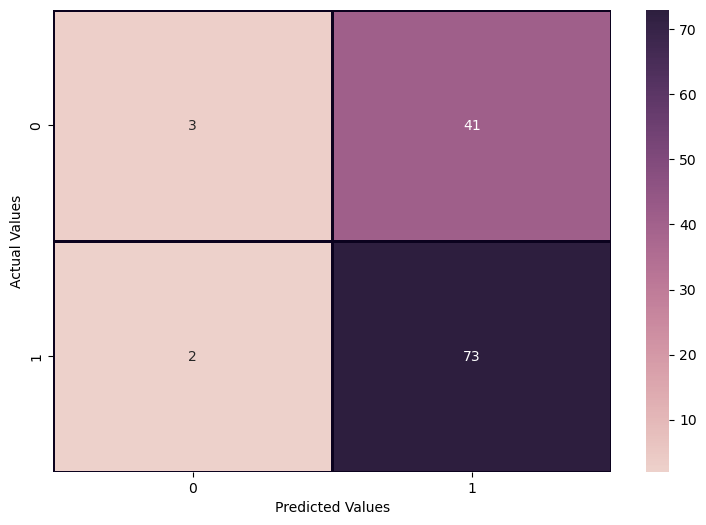

The Confusion Matrix
[[ 3 41]
 [ 2 73]]


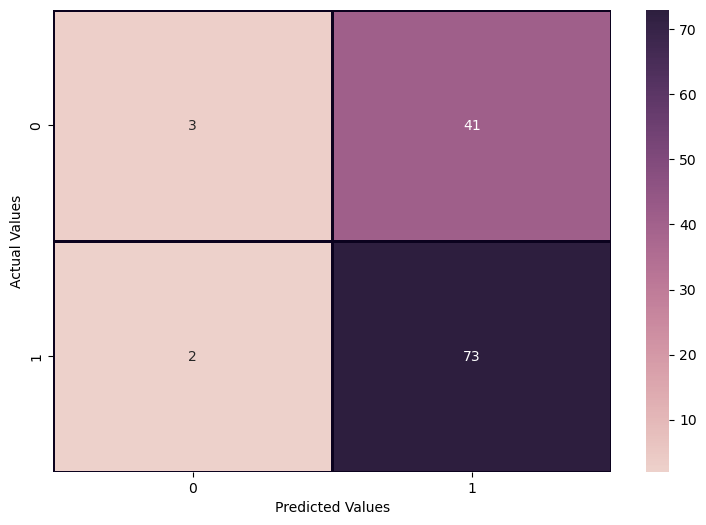

In [20]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

# Normalized

conf_mat_normal = confusion_matrix(y_normal_test, pred_normal)
print('The Confusion Matrix')
print(conf_mat_normal)

fig,ax = plt.subplots(figsize=(9,6))
conf_normal = sns.heatmap(conf_mat_normal, annot=True, fmt='1', cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, linecolor='#0B021E',)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
# plt.savefig('matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Standardized

conf_mat_standard = confusion_matrix(y_standard_test, pred_standard)
print('The Confusion Matrix')
print(conf_mat_standard)

fig,ax = plt.subplots(figsize=(9,6))
conf_standard = sns.heatmap(conf_mat_standard, annot=True, fmt='1', cmap=sns.cubehelix_palette(as_cmap=True), linewidths=1, linecolor='#0B021E',)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


Correlation Heatmap (Tentative)

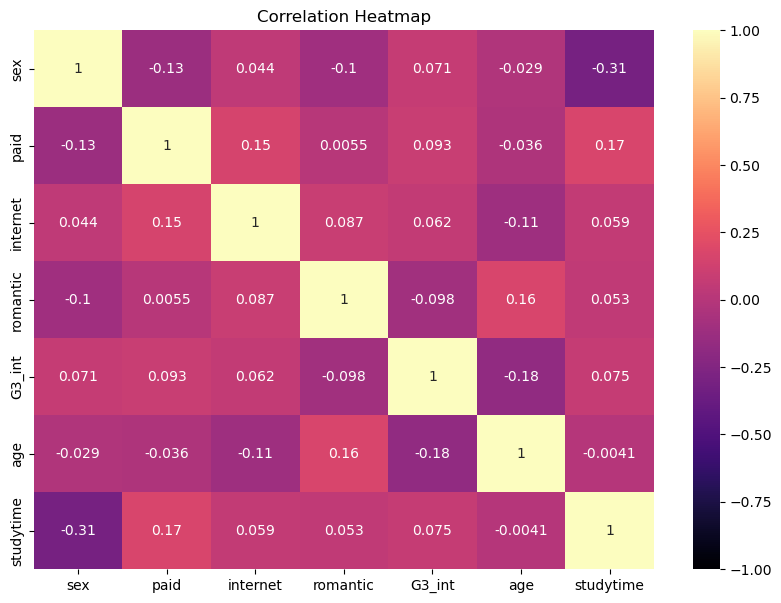

In [21]:
# Correlation Heatmap

standard_dataset = pd.concat([standard_training, standard_testing], axis = 0)


plt.figure(figsize=(10,7))
corrmap = sns.heatmap(standard_dataset.corr(), vmin=-1, vmax=1, cmap="magma", annot=True)
corrmap.set_title('Correlation Heatmap')
# plt.show()

# saved the heatmap as an image.
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')



Pearson

In [33]:
# Pearson

# Sex vs. Studytime

corr1, pval1 = pearsonr(dataset_v2['sex'],dataset_v2['studytime'])

if pval1 < 0.05:
    print(f"The correlation coefficient between sex and studytime is {corr1:.11f}, which is significant (p = {pval1:.11f})")
else:
    print(f"The correlation coefficient between sex and studytime is {corr1:.11f}, which is not significant (p = {pval1:.11f})")

# G3 vs. Age

corr2, pval2 = pearsonr(dataset_v2['G3_int'],dataset_v2['age'])

if pval2 < 0.05:
    print(f"The correlation coefficient between G3 and age is {corr2:.11f}, which is significant (p = {pval2:.11f})")
else:
    print(f"The correlation coefficient between G3 and age is {corr2:.11f}, which is not significant (p = {pval2:.11f})")



print(f'The p-value of sex and studytime is {pval1}')
print(f'The p-value of G3 and age is {pval2}')

print(f'The r of sex and studytime is {corr1}')
print(f'The r of G3 and age is {corr2}')

The correlation coefficient between sex and studytime is -0.30626761757, which is significant (p = 0.00000000050)
The correlation coefficient between G3 and age is -0.17964488578, which is significant (p = 0.00033285336)
The p-value of sex and studytime is 5.04504437128924e-10
The p-value of G3 and age is 0.0003328533608899579
The r of sex and studytime is -0.3062676175682083
The r of G3 and age is -0.17964488578240745


Pie Chart Distribution of Feature: Sex 

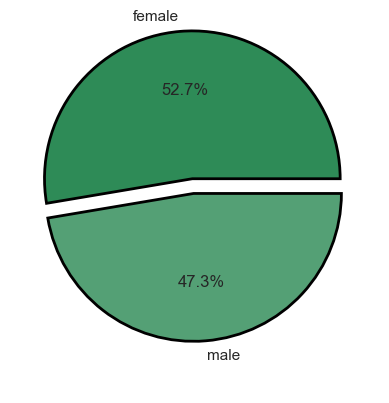

In [20]:
# Pie Chart for Sex

data = [dataset_v2['sex'].value_counts()[0], dataset_v2['sex'].value_counts()[1]]
labels = ['female', 'male']

colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.2, -0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
plt.savefig('sex-distribution.png', dpi=300, bbox_inches='tight')

plt.show()




Histogram of Feature: Age

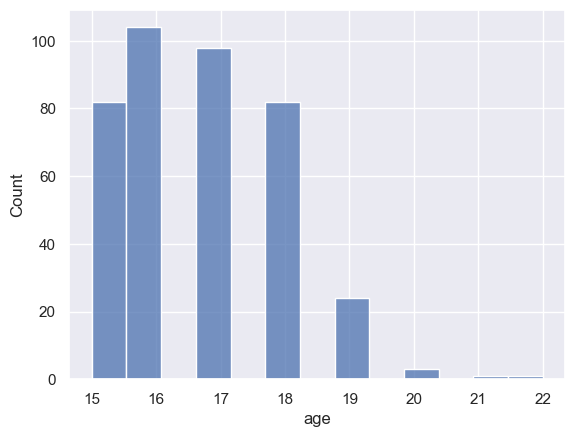

In [18]:
# Histogram for Age

sns.set(style="darkgrid")

sns.histplot(dataset_v2, x = "age")

plt.savefig('age-distribution.png', dpi=300, bbox_inches='tight')

# plt.show()

Pie Chart Distribution of Feature: Internet

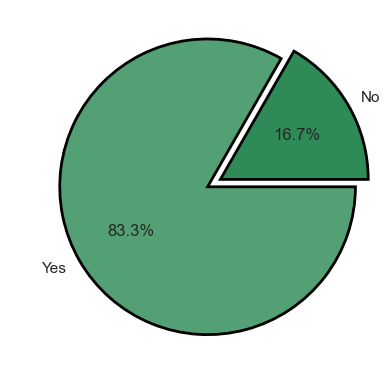

In [14]:
# Pie Chart of Internet

data = [dataset_v2['internet'].value_counts()[0], dataset_v2['internet'].value_counts()[1]]
labels = ['No', 'Yes']

colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.2, -0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
plt.savefig('internet-distribution.png', dpi=300, bbox_inches='tight')
# plt.show()


Pie Chart Distribution of Feature: Paid

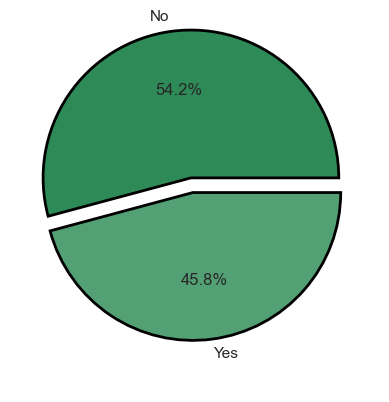

In [21]:
# Pie Chart of Paid

data = [dataset_v2['paid'].value_counts()[0], dataset_v2['paid'].value_counts()[1]]
labels = ['No', 'Yes']

colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.2, -0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
# plt.show()
plt.savefig('paid-distribution.png', dpi=300, bbox_inches='tight')

Pie Chart Distribution of Feature: Romantic

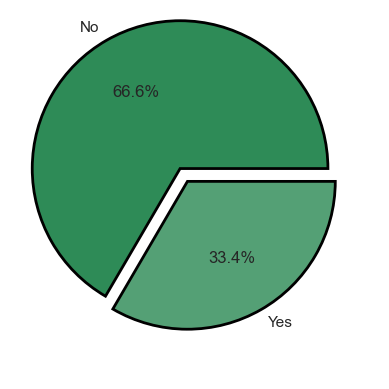

In [22]:
# Pie Chart of Romantic

data = [dataset_v2['romantic'].value_counts()[0], dataset_v2['romantic'].value_counts()[1]]
labels = ['No', 'Yes']

colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.2, -0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
# plt.show()
plt.savefig('romantic-distribution.png', dpi=300, bbox_inches='tight')


Pie Chart Distribution of Feature: Studytime

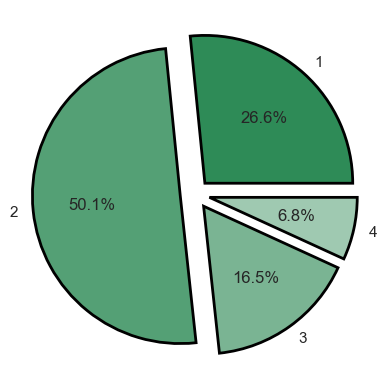

In [23]:
# Pie Chart of Studytime

data = [dataset_v2['studytime'].value_counts()[1], dataset_v2['studytime'].value_counts()[2], dataset_v2['studytime'].value_counts()[3], dataset_v2['studytime'].value_counts()[4]]
labels = ['1', '2', '3', '4']

colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
# plt.show()
plt.savefig('studytime-distribution.png', dpi=300, bbox_inches='tight')


Pie Chart Distribution of Feature: G3

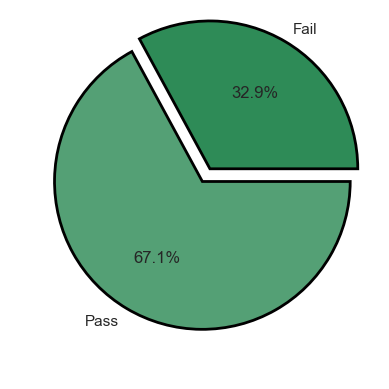

In [25]:
# Pie Chart of G3

data = [dataset_v2['G3_int'].value_counts()[0], dataset_v2['G3_int'].value_counts()[1]]
labels = ['Fail', 'Pass']


colors = sns.light_palette('seagreen', reverse=True)[0:5]
explode = [0.2, -0.1]
plt.pie(data, labels=labels, radius=1, explode=explode, colors= colors, autopct='%1.1f%%', pctdistance=0.6 , shadow=False, wedgeprops={"edgecolor":"black", 
                                                                                                                           'linewidth': 2,
                                                                                                                           'antialiased':True} )
# plt.show()
plt.savefig('G3-distribution.png', dpi=300, bbox_inches='tight')


